# walmart

In [1]:
import sys
sys.path.append('..')

In [2]:
# imoports
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

/tmp/ipykernel_7483/665868124.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# constants

FEATURES_DATA_FILE = '../data/features.csv'
STORES_DATA_FILE = '../data/stores.csv'
TRAIN_DATA_FILE = '../data/train.csv'
TEST_DATA_FILE = '../data/test.csv'

## Load the data

In [4]:
features_df = pd.read_csv(FEATURES_DATA_FILE)
store_df = pd.read_csv(STORES_DATA_FILE)
train_original_df = pd.read_csv(TRAIN_DATA_FILE)

In [5]:
features_df["Date"] = features_df["Date"].apply(pd.to_datetime)
train_original_df["Date"] = train_original_df["Date"].apply(pd.to_datetime)

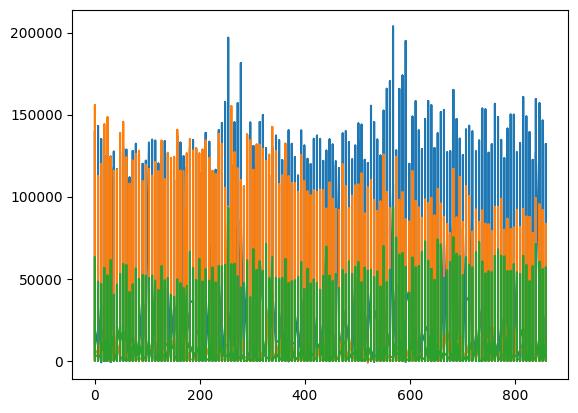

In [6]:
view_df = train_original_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df["DN"] = (view_df["DN"] / 100000000000000).astype(int)
view_df["DN"] = view_df["DN"] - view_df["DN"].min()

view_df = view_df.sort_values(by=["DN"])

for store in view_df["Store"].sort_values().unique():
    if int(store) in [1, 3, 5]:
        x = view_df[view_df["Store"] == store]["DN"]
        y = view_df[view_df["Store"] == store]["Weekly_Sales"]
        plt.plot(x, y)



In [7]:
df = train_original_df.copy()

In [8]:
SINGLE_STORE = False

if SINGLE_STORE:
    df = df[(df["Store"] == 1) & (df["Dept"] == 1)]

# Combine the tables

In [9]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
df = df.merge(store_df, on="Store")
df = df.merge(features_df, on=["Store", "Date"])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


### why we removing features with missing values

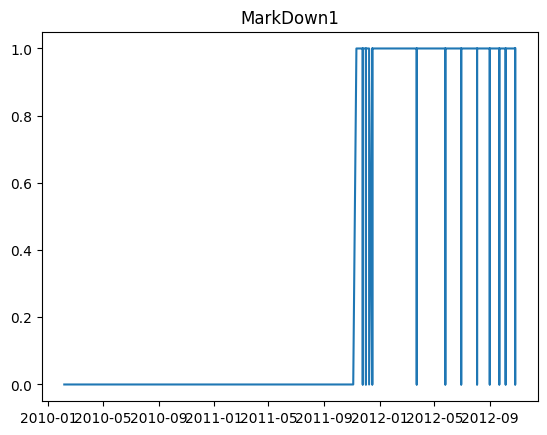

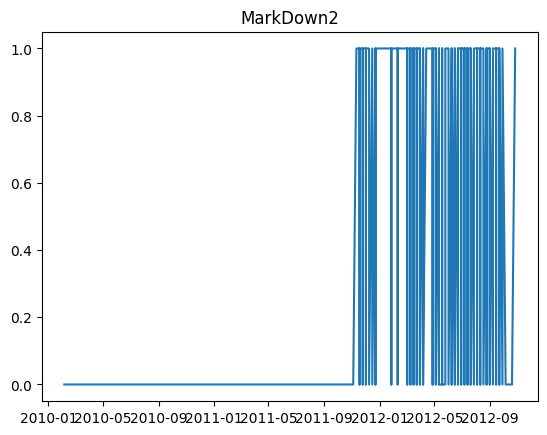

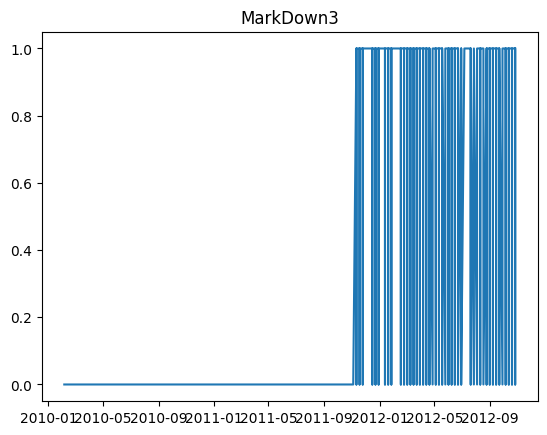

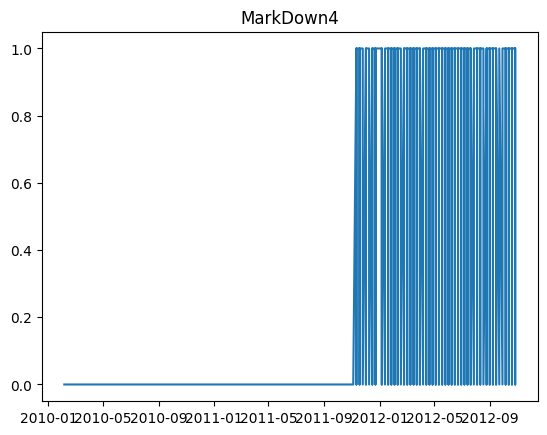

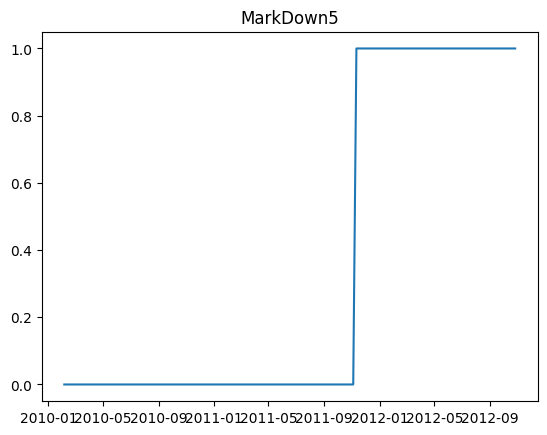

In [13]:
x = df.sort_values(by=["Date"])["Date"]


for column in df.columns:
    if df[column].isna().sum() > 0:
        plt.title(column)
        plt.plot(x, df.sort_values(by=["Date"])[column].isna().astype(int) * -1 + 1)
        plt.show()


As you can see, the MarkDown columns have lots of missing values in hafe of the weeks of the data

In [14]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

df

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,False


In [15]:
# view_df = df.copy()
# view_df = view_df.groupby("Store")

# view_df.median()
# view_df = view_df.sort_values(by=["Size"])

# plt.bar(view_df["Store"], view_df["Size"])
# plt.bar(view_df["Store"], view_df["Size"])

## First Describe of the data

In [16]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False


In [17]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296


In [18]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

In [19]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

In [20]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [21]:
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,1,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,1,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,1,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,1,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,1,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,64.88,3.997,192.013558,8.684,False,2,118221
421566,45,98,2012-10-05,628.10,64.89,3.985,192.170412,8.667,False,2,118221
421567,45,98,2012-10-12,1061.02,54.47,4.000,192.327265,8.667,False,2,118221
421568,45,98,2012-10-19,760.01,56.47,3.969,192.330854,8.667,False,2,118221


In [22]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

In [23]:
for i in range(1, 5):
    df["Weekly-Sales-last-" + str(i) + "-weeks"] = df["Weekly_Sales"].shift(i)

for i in range(1, 4):
    df["Weekly-Diff-last-" + str(i) + "-weeks"] = df["Weekly-Sales-last-" + str(i) + "-weeks"] - df["Weekly-Sales-last-" + str(i+1) + "-weeks"]

df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)

df = df.drop(index=df.head(6).index)

In [24]:
for i in range(5):
    df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(1)].index)

In [25]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [26]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [27]:
df = df.drop(columns=["Store-Dept"])

In [28]:
df = df.drop(columns=["Weekly_Sales"])

In [29]:
df

,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-1-weeks,Weekly-Sales-last-2-weeks,Weekly-Sales-last-3-weeks,Weekly-Sales-last-4-weeks,Weekly-Diff-last-1-weeks,Weekly-Diff-last-2-weeks,Weekly-Diff-last-3-weeks,Weekly-Diff
index-2,,,,,,,,,,,,,,,,,,
11,1,1,2010-04-23,64.84,2.795,210.439123,7.808,0,1,151315,17596.96,42960.91,57258.43,26229.21,-25363.95,-14297.52,31029.22,-1451.61
12,1,1,2010-04-30,67.41,2.780,210.389546,7.808,0,1,151315,16145.35,17596.96,42960.91,57258.43,-1451.61,-25363.95,-14297.52,409.76
13,1,1,2010-05-07,72.55,2.835,210.339968,7.808,0,1,151315,16555.11,16145.35,17596.96,42960.91,409.76,-1451.61,-25363.95,858.83
14,1,1,2010-05-14,74.78,2.854,210.337426,7.808,0,1,151315,17413.94,16555.11,16145.35,17596.96,858.83,409.76,-1451.61,1512.80
15,1,1,2010-05-21,76.44,2.826,210.617093,7.808,0,1,151315,18926.74,17413.94,16555.11,16145.35,1512.80,858.83,409.76,-4153.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87519,9,98,2011-12-16,47.31,3.159,222.882548,6.054,0,2,125833,75.77,54.75,60.75,42.00,21.02,-6.00,18.75,-9.02
87520,9,98,2011-12-23,44.43,3.112,223.066113,6.054,0,2,125833,66.75,75.77,54.75,60.75,-9.02,21.02,-6.00,-41.25
87521,9,98,2012-01-06,47.54,3.157,223.433241,5.667,0,2,125833,25.50,66.75,75.77,54.75,-41.25,-9.02,21.02,-25.00


# split to train and test

In [30]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

df = df[df["Date"] <= limit_date].copy()

df = df.reset_index()

In [31]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = df[df["Date"] <= limit_date].copy()
test_df = df[df["Date"] > limit_date].copy()

train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [32]:
df["Date"].sort_values().unique()

<DatetimeArray>
['2010-03-12 00:00:00', '2010-03-19 00:00:00', '2010-03-26 00:00:00',
 '2010-04-02 00:00:00', '2010-04-09 00:00:00', '2010-04-16 00:00:00',
 '2010-04-23 00:00:00', '2010-04-30 00:00:00', '2010-05-07 00:00:00',
 '2010-05-14 00:00:00',
 ...
 '2012-02-17 00:00:00', '2012-02-24 00:00:00', '2012-03-02 00:00:00',
 '2012-03-09 00:00:00', '2012-03-16 00:00:00', '2012-03-23 00:00:00',
 '2012-03-30 00:00:00', '2012-04-06 00:00:00', '2012-04-13 00:00:00',
 '2012-04-20 00:00:00']
Length: 111, dtype: datetime64[ns]

In [33]:
train_df["Date"].sort_values().unique()

<DatetimeArray>
['2010-03-12 00:00:00', '2010-03-19 00:00:00', '2010-03-26 00:00:00',
 '2010-04-02 00:00:00', '2010-04-09 00:00:00', '2010-04-16 00:00:00',
 '2010-04-23 00:00:00', '2010-04-30 00:00:00', '2010-05-07 00:00:00',
 '2010-05-14 00:00:00', '2010-05-21 00:00:00', '2010-05-28 00:00:00',
 '2010-06-04 00:00:00', '2010-06-11 00:00:00', '2010-06-18 00:00:00',
 '2010-06-25 00:00:00', '2010-07-02 00:00:00', '2010-07-09 00:00:00',
 '2010-07-16 00:00:00', '2010-07-23 00:00:00', '2010-07-30 00:00:00',
 '2010-08-06 00:00:00', '2010-08-13 00:00:00', '2010-08-20 00:00:00',
 '2010-08-27 00:00:00', '2010-09-03 00:00:00', '2010-09-10 00:00:00',
 '2010-09-17 00:00:00', '2010-09-24 00:00:00', '2010-10-01 00:00:00',
 '2010-10-08 00:00:00', '2010-10-15 00:00:00', '2010-10-22 00:00:00',
 '2010-10-29 00:00:00', '2010-11-05 00:00:00', '2010-11-12 00:00:00',
 '2010-11-19 00:00:00', '2010-11-26 00:00:00', '2010-12-03 00:00:00',
 '2010-12-10 00:00:00', '2010-12-17 00:00:00', '2010-12-24 00:00:00',
 '20

In [34]:
test_df["Date"].sort_values().unique()

<DatetimeArray>
['2011-12-02 00:00:00', '2011-12-09 00:00:00', '2011-12-16 00:00:00',
 '2011-12-23 00:00:00', '2011-12-30 00:00:00', '2012-01-06 00:00:00',
 '2012-01-13 00:00:00', '2012-01-20 00:00:00', '2012-01-27 00:00:00',
 '2012-02-03 00:00:00', '2012-02-10 00:00:00', '2012-02-17 00:00:00',
 '2012-02-24 00:00:00', '2012-03-02 00:00:00', '2012-03-09 00:00:00',
 '2012-03-16 00:00:00', '2012-03-23 00:00:00', '2012-03-30 00:00:00',
 '2012-04-06 00:00:00', '2012-04-13 00:00:00', '2012-04-20 00:00:00']
Length: 21, dtype: datetime64[ns]

In [35]:
mean_size = train_df["Store-Size"].mean()
std_size = train_df["Store-Size"].std()
train_df["Store-Size"] = (train_df["Store-Size"] - mean_size) / std_size
test_df["Store-Size"] = (test_df["Store-Size"] - mean_size) / std_size

In [36]:
train_df = train_df.drop(columns=["index-2"])
test_df = test_df.drop(columns=["index-2"])

In [37]:
train_df.head()

,index,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-1-weeks,Weekly-Sales-last-2-weeks,Weekly-Sales-last-3-weeks,Weekly-Sales-last-4-weeks,Weekly-Diff-last-1-weeks,Weekly-Diff-last-2-weeks,Weekly-Diff-last-3-weeks,Weekly-Diff
0,0,1,1,2010-04-23,64.84,2.795,210.439123,7.808,0,1,0.234554,17596.96,42960.91,57258.43,26229.21,-25363.95,-14297.52,31029.22,-1451.61
1,1,1,1,2010-04-30,67.41,2.780,210.389546,7.808,0,1,0.234554,16145.35,17596.96,42960.91,57258.43,-1451.61,-25363.95,-14297.52,409.76
2,2,1,1,2010-05-07,72.55,2.835,210.339968,7.808,0,1,0.234554,16555.11,16145.35,17596.96,42960.91,409.76,-1451.61,-25363.95,858.83
3,3,1,1,2010-05-14,74.78,2.854,210.337426,7.808,0,1,0.234554,17413.94,16555.11,16145.35,17596.96,858.83,409.76,-1451.61,1512.80
4,4,1,1,2010-05-21,76.44,2.826,210.617093,7.808,0,1,0.234554,18926.74,17413.94,16555.11,16145.35,1512.80,858.83,409.76,-4153.70


In [38]:
test_df.head()

,index,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-1-weeks,Weekly-Sales-last-2-weeks,Weekly-Sales-last-3-weeks,Weekly-Sales-last-4-weeks,Weekly-Diff-last-1-weeks,Weekly-Diff-last-2-weeks,Weekly-Diff-last-3-weeks,Weekly-Diff
0,84,1,1,2011-12-02,48.91,3.172,218.714733,7.866,0,1,0.234554,20911.25,19050.66,18689.54,39886.06,1860.59,361.12,-21196.52,4382.24
1,85,1,1,2011-12-09,43.93,3.158,218.961846,7.866,0,1,0.234554,25293.49,20911.25,19050.66,18689.54,4382.24,1860.59,361.12,8012.43
2,86,1,1,2011-12-16,51.63,3.159,219.179453,7.866,0,1,0.234554,33305.92,25293.49,20911.25,19050.66,8012.43,4382.24,1860.59,12467.11
3,87,1,1,2011-12-23,47.96,3.112,219.357722,7.866,0,1,0.234554,45773.03,33305.92,25293.49,20911.25,12467.11,8012.43,4382.24,1015.72
4,88,1,1,2011-12-30,44.55,3.129,219.535990,7.866,1,1,0.234554,46788.75,45773.03,33305.92,25293.49,1015.72,12467.11,8012.43,-23437.87


## Visualize the data

In [39]:
def date_show(date_value):
    return str(date_value).split(" ")[0].split('-')[2] + '-' + str(date_value).split(" ")[0].split('-')[1]

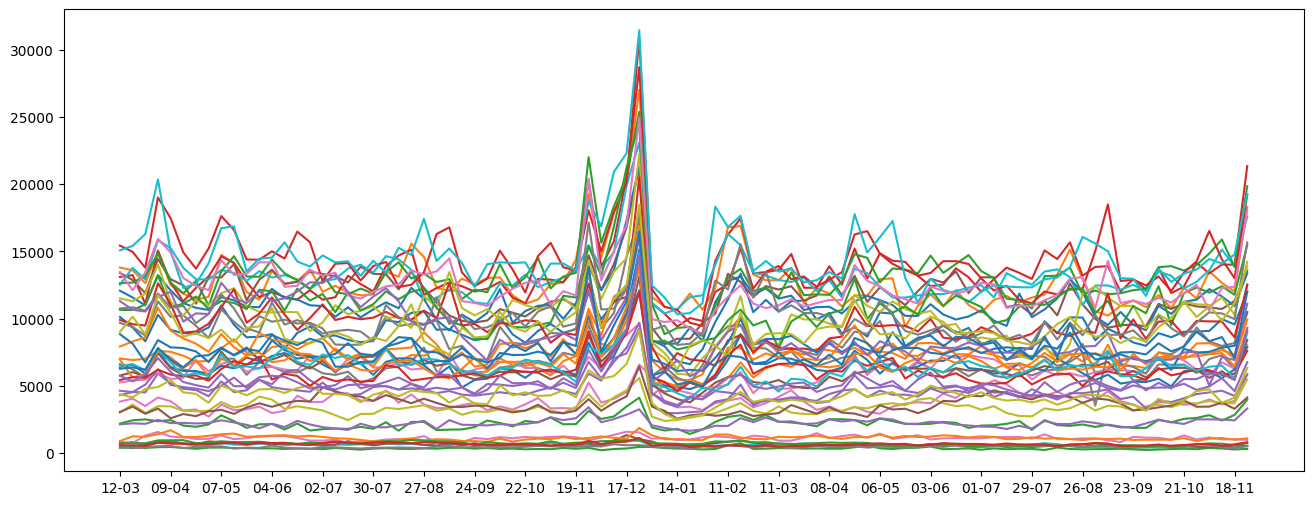

In [40]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = (dept_view_df["Weekly-Sales-last-1-weeks"] + dept_view_df["Weekly-Diff"])
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)
    
    plt.plot(xy.index, xy.median(axis=1))
    
plt.show()

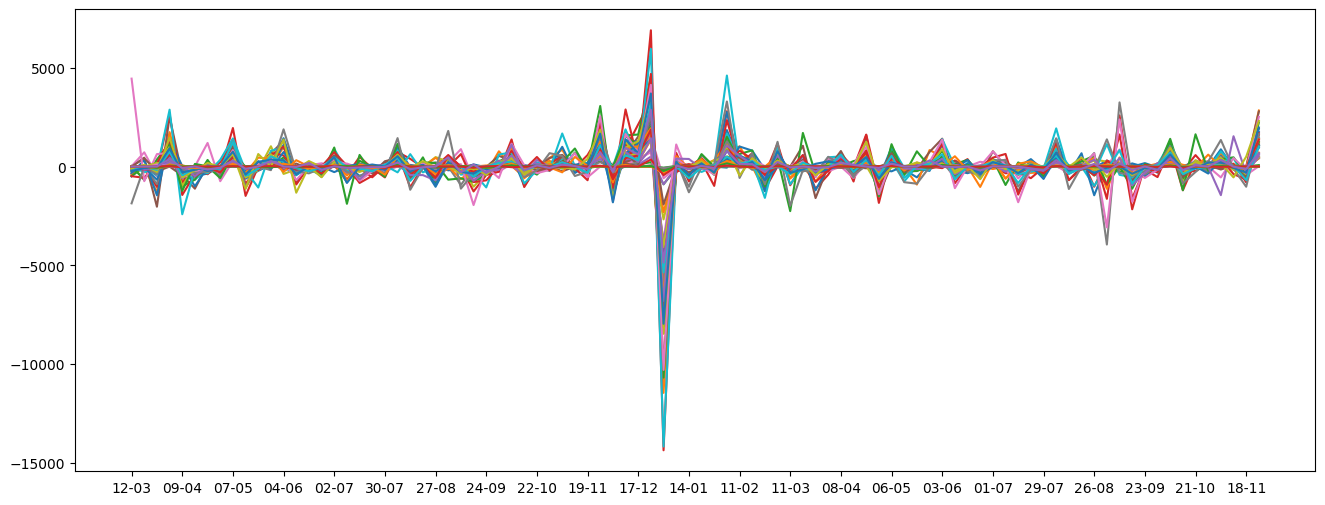

In [41]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Diff"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)
    
    plt.plot(xy.index, xy.median(axis=1))
    
plt.show()

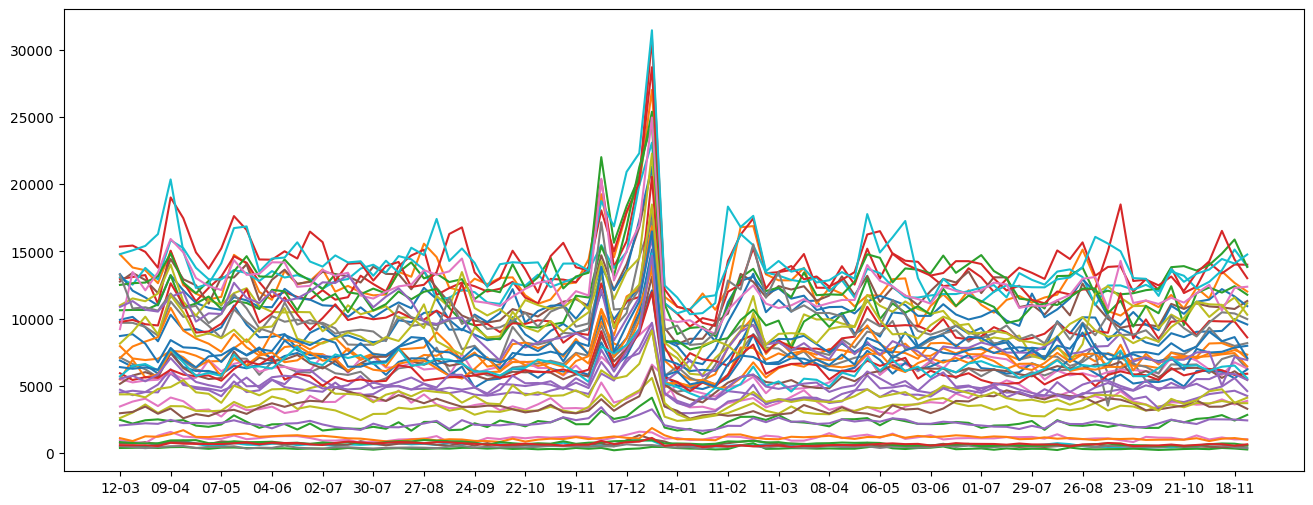

In [42]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Sales-last-1-weeks"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)
    
    plt.plot(xy.index, xy.median(axis=1))
    
plt.show()

We now known that the weeks of Thanksgiving Day and Christmas are extreme for sales for walmart

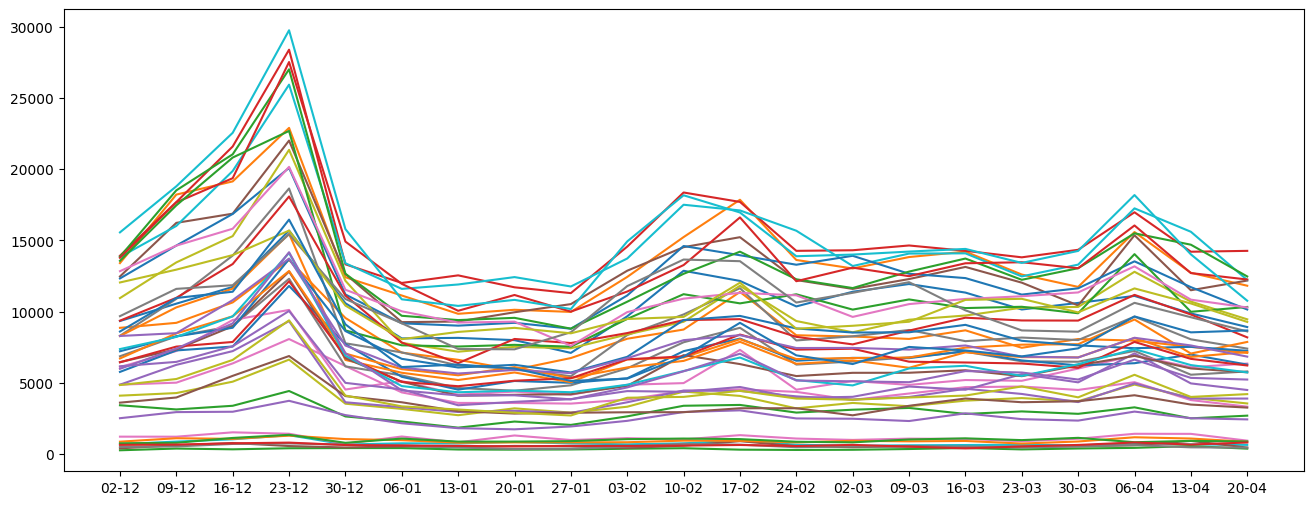

In [43]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = (dept_view_df["Weekly-Sales-last-1-weeks"] + dept_view_df["Weekly-Diff"])
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)
    
    plt.plot(xy.index, xy.median(axis=1))
    
plt.show()

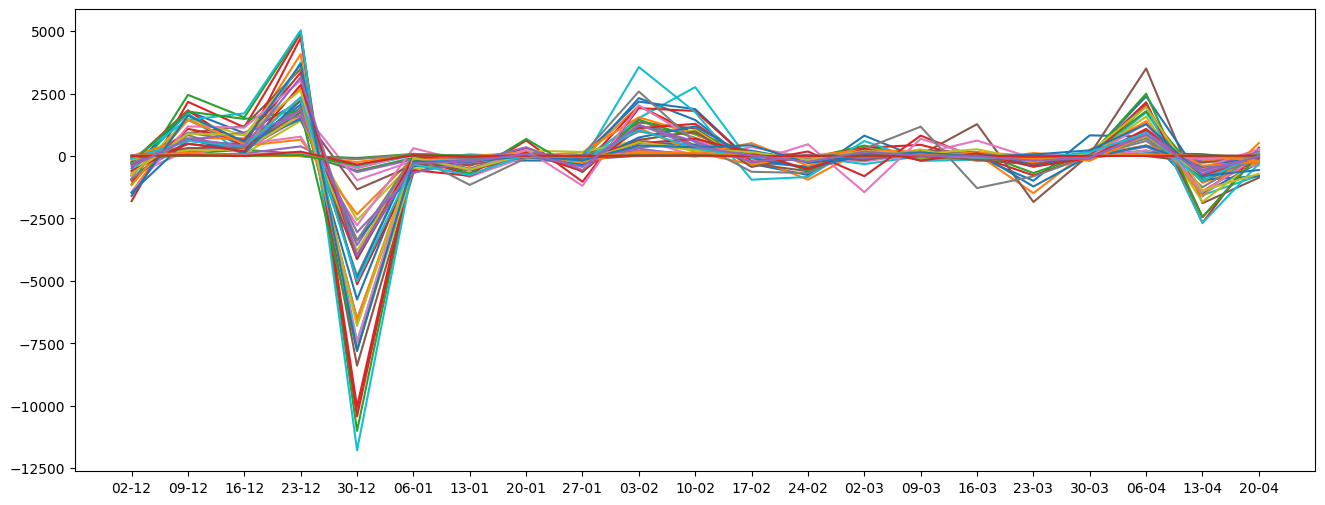

In [44]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Diff"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)
    
    plt.plot(xy.index, xy.median(axis=1))
    
plt.show()

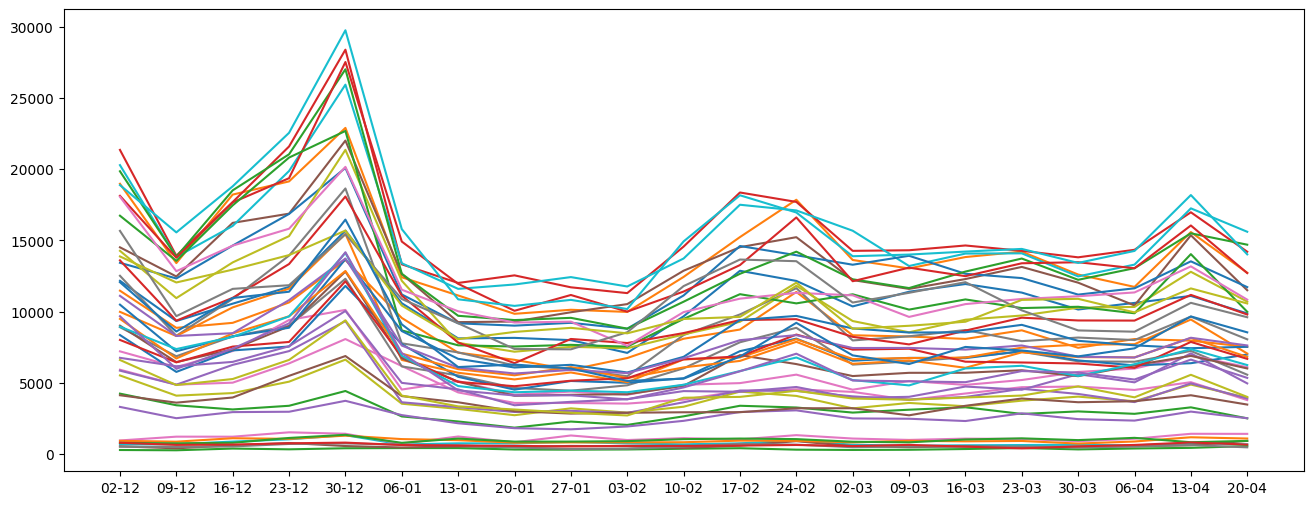

In [45]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Sales-last-1-weeks"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)
    
    plt.plot(xy.index, xy.median(axis=1))
    
plt.show()

other

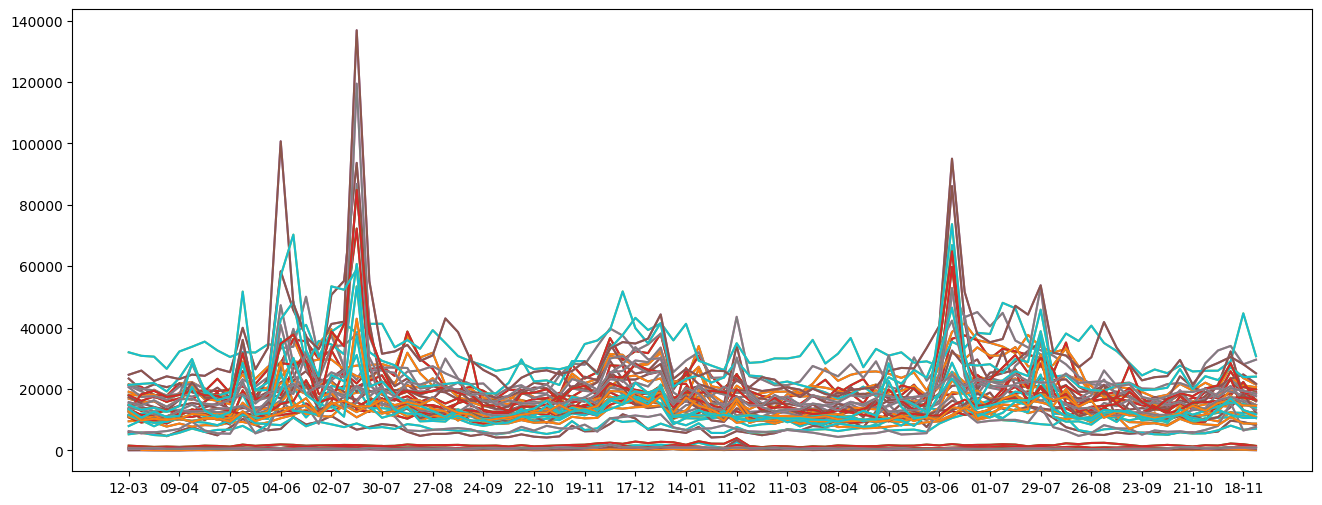

In [46]:
DEPT = 11

view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[(view_df["Store"] == store) & (view_df["Dept"] == DEPT)]

    labels = store_view_df["Date"].apply(date_show)
    x = store_view_df["DN"]
    y = store_view_df["Weekly-Sales-last-1-weeks"]
    
    plt.plot(x, y)
    if first_iteration:
        plt.xticks(ticks=x[::4], labels=labels[::4])
        first_iteration = False
    
    plt.plot(x, y)
    
plt.show()

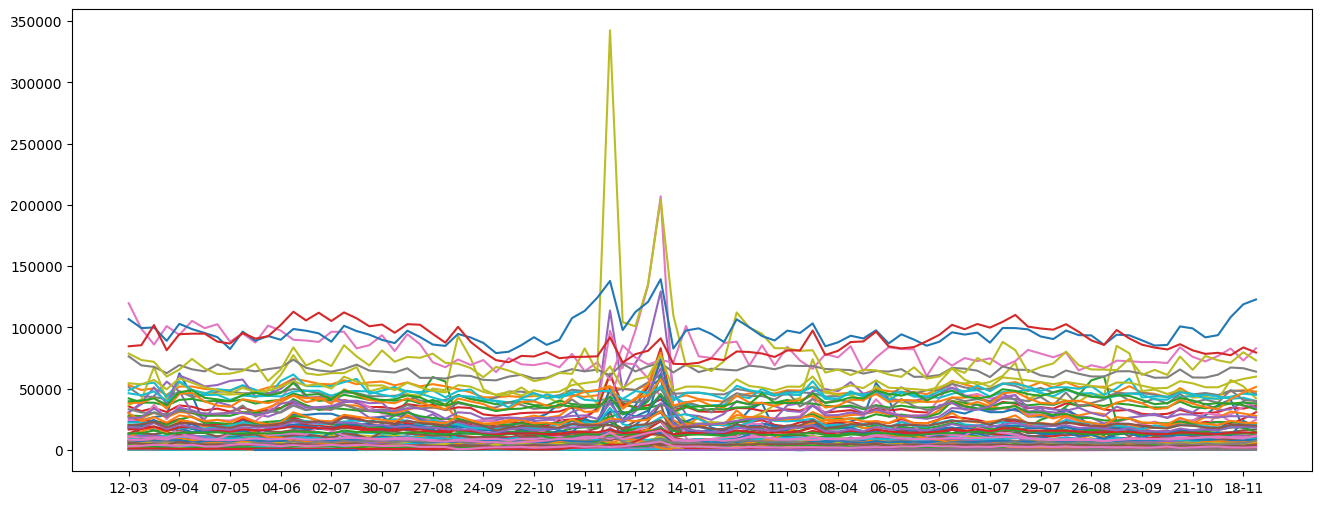

In [47]:
STORE = 6

view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for dept in view_df["Dept"].sort_values().unique():
    dept_view_df = view_df[(view_df["Store"] == STORE) & (view_df["Dept"] == dept)]

    labels = dept_view_df["Date"].apply(date_show)
    x = dept_view_df["DN"]
    y = dept_view_df["Weekly-Sales-last-1-weeks"]
    
    plt.plot(x, y)
    if first_iteration:
        plt.xticks(ticks=x[::4], labels=labels[::4])
        first_iteration = False

plt.show()

adding year as sin and cos

In [48]:
YEAR = pd.Timestamp('2001-01-01').value - pd.Timestamp('2000-01-01').value

train_df['Year-Sin'] = np.sin(train_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))
train_df['Year-Cos'] = np.cos(train_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))

test_df['Year-Sin'] = np.sin(test_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))
test_df['Year-Cos'] = np.cos(test_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))

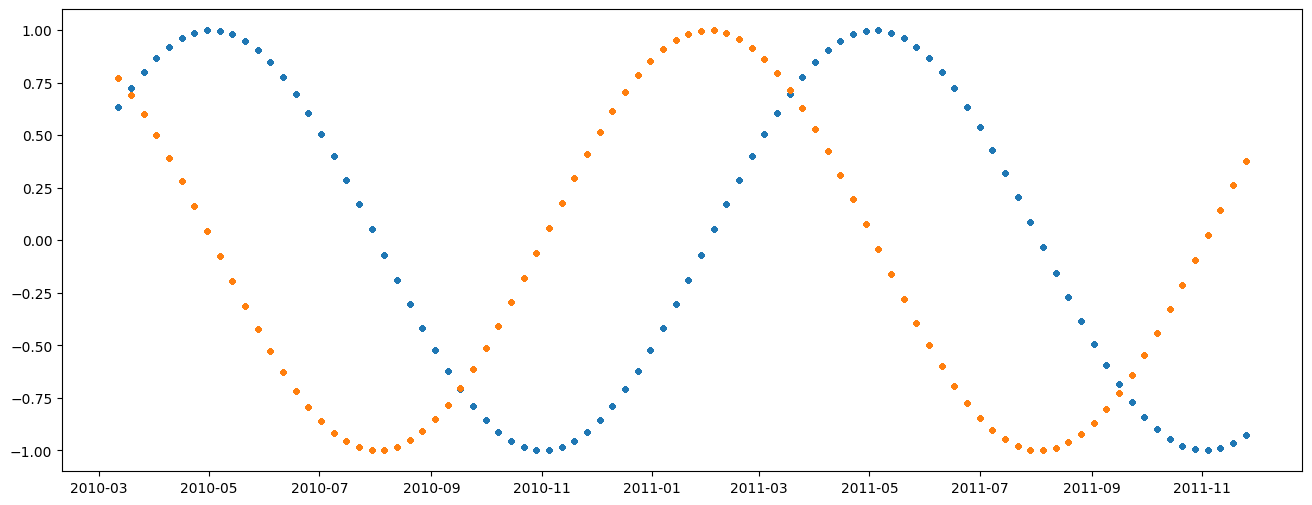

In [49]:
plt.figure(figsize=(16, 6))

plt.plot(train_df["Date"], train_df["Year-Sin"], '.')
plt.plot(train_df["Date"], train_df["Year-Cos"], '.')

plt.show()

## Model LinearRegression

In [132]:
train_1_df = train_df.copy()
test_1_df = test_df.copy()

In [133]:
for store in store_df["Store"].unique():
    train_1_df["Store-" + str(store)] = (train_1_df["Store"] == store).map({True: 1, False: 0})
    test_1_df["Store-" + str(store)] = (test_1_df["Store"] == store).map({True: 1, False: 0})

for dept in train_1_df["Dept"].unique():
    train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
    test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})

/tmp/ipykernel_7483/2157136067.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
/tmp/ipykernel_7483/2157136067.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})
/tmp/ipykernel_7483/2157136067.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [134]:
train_1_df = train_1_df.drop(columns=["Store", "Dept"])
test_1_df = test_1_df.drop(columns=["Store", "Dept"])

In [135]:
train_1_df.columns

Index(['index', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Store-Type', 'Store-Size', 'Weekly-Sales-last-1-weeks',
       ...
       'Dept-93', 'Dept-94', 'Dept-95', 'Dept-96', 'Dept-97', 'Dept-98',
       'Dept-99', 'Dept-50', 'Dept-78', 'Dept-65'],
      dtype='object', length=142)

In [136]:
train_1_df.columns.size, test_1_df.columns.size

(142, 142)

In [137]:
x_train = train_1_df.drop(columns=["Weekly-Diff"])
y_train = train_1_df["Weekly-Diff"]

x_test = test_1_df.drop(columns=["Weekly-Diff"])
y_test = test_1_df["Weekly-Diff"]

In [138]:
x_train["Date"] = x_train["Date"].apply(lambda x: x.value)
x_test["Date"] = x_test["Date"].apply(lambda x: x.value)

In [139]:
for column in x_train.columns:
    x_train[column] = x_train[column].astype(float)
    x_test[column] = x_test[column].astype(float)


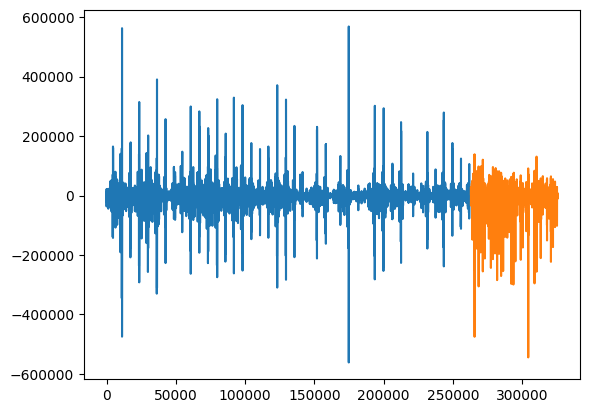

In [140]:
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test)

In [141]:
y_train.min(), y_test.min()

(-561345.54, -544310.8500000001)

In [142]:
y_train.describe()

count    263003.000000
mean         74.727099
std        7535.656472
min     -561345.540000
25%        -618.460000
50%           1.870000
75%         667.005000
max      568347.700000
Name: Weekly-Diff, dtype: float64

In [143]:
mean_norm = y_train.mean()
std_norm = y_train.std()

y_train = (y_train - mean_norm) / std_norm
y_test = (y_test - mean_norm) / std_norm

In [144]:
y_train.describe()

count    2.630030e+05
mean    -3.640477e-18
std      1.000000e+00
min     -7.450184e+01
25%     -9.198762e-02
50%     -9.668315e-03
75%      7.859672e-02
max      7.541121e+01
Name: Weekly-Diff, dtype: float64

In [145]:
x_train.describe()

,index,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-1-weeks,...,Dept-93,Dept-94,Dept-95,Dept-96,Dept-97,Dept-98,Dept-99,Dept-50,Dept-78,Dept-65
count,263003.000000,2.630030e+05,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,2.630030e+05,263003.000000,...,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000
mean,162646.200279,1.295361e+18,61.202052,3.231825,169.414402,8.238731,0.067151,1.587164,3.123110e-17,15937.861537,...,0.014011,0.013106,0.015399,0.011213,0.014985,0.013608,0.000570,0.003684,0.000190,0.000342
std,93940.571808,1.570399e+16,18.275569,0.442394,38.386402,1.870054,0.250284,0.664492,1.000000e+00,22423.864449,...,0.117537,0.113730,0.123134,0.105295,0.121491,0.115858,0.023875,0.060587,0.013787,0.018496
min,0.000000,1.268352e+18,-2.060000,2.513000,126.064000,4.420000,0.000000,1.000000,-1.678654e+00,-4988.940000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81342.500000,1.281658e+18,48.450000,2.819000,132.064433,7.287000,0.000000,1.000000,-7.131279e-01,2183.005000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,162621.000000,1.295568e+18,63.440000,3.139000,182.256960,8.028000,0.000000,1.000000,5.138316e-02,7712.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,244006.500000,1.308874e+18,74.830000,3.625000,211.064888,8.684000,0.000000,2.000000,1.075650e+00,20172.815000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,325414.000000,1.322179e+18,100.140000,4.211000,222.138968,14.313000,1.000000,3.000000,1.356896e+00,693099.360000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
for column in x_train.columns:
    if x_train[column].max() > 1:
        x_mean_size = x_train[column].mean()
        x_std_size = x_train[column].std()

        x_train[column] = (x_train[column] - x_mean_size) / x_std_size
        x_test[column] = (x_test[column] - x_mean_size) / x_std_size

In [147]:
x_train.describe()

,index,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-1-weeks,...,Dept-93,Dept-94,Dept-95,Dept-96,Dept-97,Dept-98,Dept-99,Dept-50,Dept-78,Dept-65
count,2.630030e+05,2.630030e+05,2.630030e+05,2.630030e+05,2.630030e+05,2.630030e+05,263003.000000,2.630030e+05,2.630030e+05,2.630030e+05,...,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000
mean,-1.824156e-16,-9.041796e-15,-2.001384e-16,1.516167e-15,5.463822e-16,8.749032e-16,0.067151,6.440740e-17,2.453101e-17,-7.694307e-17,...,0.014011,0.013106,0.015399,0.011213,0.014985,0.013608,0.000570,0.003684,0.000190,0.000342
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.250284,1.000000e+00,1.000000e+00,1.000000e+00,...,0.117537,0.113730,0.123134,0.105295,0.121491,0.115858,0.023875,0.060587,0.013787,0.018496
min,-1.731373e+00,-1.719879e+00,-3.461564e+00,-1.624852e+00,-1.129317e+00,-2.042043e+00,0.000000,-8.836286e-01,-1.678654e+00,-9.332380e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.654802e-01,-8.726044e-01,-6.977650e-01,-9.331608e-01,-9.730000e-01,-5.089324e-01,0.000000,-8.836286e-01,-7.131279e-01,-6.134026e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.682577e-04,1.318328e-02,1.224557e-01,-2.098238e-01,3.345601e-01,-1.126872e-01,0.000000,-8.836286e-01,5.138316e-02,-3.668334e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.660827e-01,8.604584e-01,7.456922e-01,8.887443e-01,1.085032e+00,2.381047e-01,0.000000,6.212797e-01,1.075650e+00,1.888592e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.732668e+00,1.707734e+00,2.130601e+00,2.213355e+00,1.373522e+00,3.248178e+00,1.000000,2.126188e+00,1.356896e+00,3.019825e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [149]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([263003, 141]),
 torch.Size([263003]),
 torch.Size([62418, 141]),
 torch.Size([62418]))

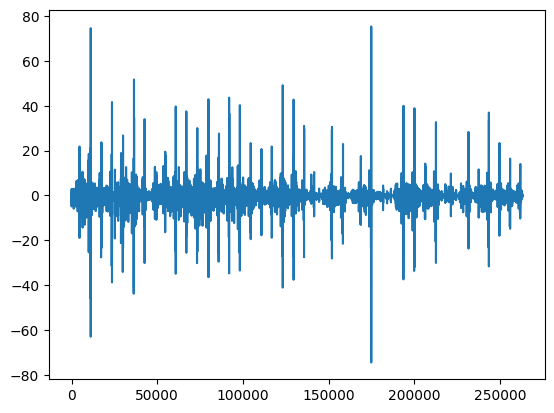

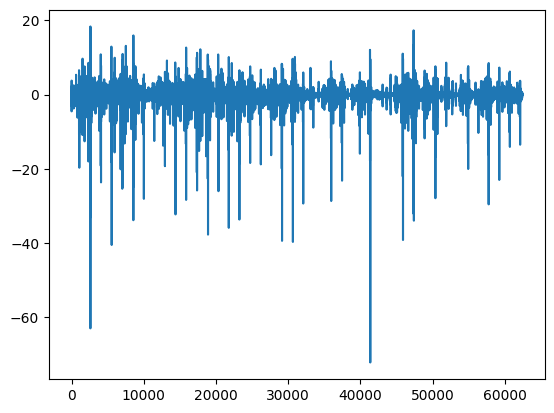

In [150]:
plt.plot(range(len(y_train)), y_train)
plt.show()

plt.plot(range(len(y_test)), y_test)
plt.show()

In [151]:
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize: int):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, 1)

    def forward(self, x):
        out = self.linear(x)
        return out


def train_model_1(x_train, y_train, model, criterion, num_epochs, batch_size):
    lr = 0.01

    # Define an optimizer (Stochastic Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    losses = []

    for epoch in range(num_epochs):
        running_loss = 0

        for batch in train_loader:
            inputs, targets = batch

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
                
        losses.append(running_loss / len(train_loader))

        if epoch % int(num_epochs / 10) == 0:
            print(f'Epoch [{epoch}], Running Loss: {running_loss:.4f}')

    return losses



linear_regression_model = LinearRegression(x_train.shape[1])
criterion = torch.nn.MSELoss()

batch_size = 128

losses = train_model_1(x_train, y_train, linear_regression_model, criterion, 30, batch_size)

/tmp/ipykernel_7483/3245564905.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
/home/omer/anaconda3/envs/urinakysis-analysis/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/omer/anaconda3/envs/urinakysis-analysis/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([91])) that is different to the input size (torch.Size([91, 1])). This will likely lead to incorr

Epoch [0], Running Loss: 2060.5990
Epoch [3], Running Loss: 2055.1854
Epoch [6], Running Loss: 2055.0249
Epoch [9], Running Loss: 2054.9474
Epoch [12], Running Loss: 2055.0039
Epoch [15], Running Loss: 2054.9750
Epoch [18], Running Loss: 2055.0277
Epoch [21], Running Loss: 2055.2176
Epoch [24], Running Loss: 2055.3385
Epoch [27], Running Loss: 2054.9123


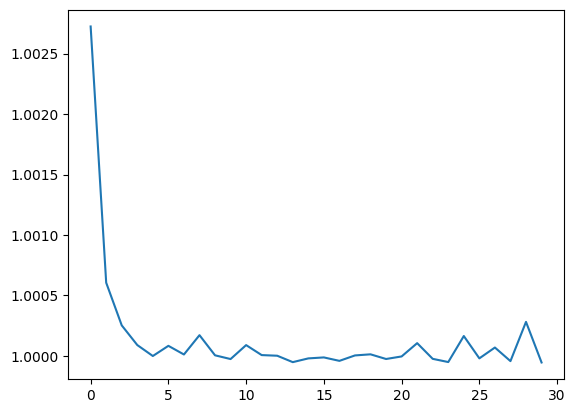

In [152]:
plt.plot(losses)

In [153]:
test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

running_loss = 0

results_target = []
results_output = []

for batch in test_loader:
    inputs, targets = batch

    outputs = linear_regression_model(inputs)
    loss = criterion(outputs, targets)

    results_target += targets.detach().numpy().tolist()
    results_output += outputs.detach().numpy().tolist()

    running_loss += loss.item()
        
    print(f'Loss: {loss.item():.4f}')

target_loss = running_loss / len(test_loader)

print(f'Target: {target_loss:.4f} Running Loss: {running_loss:.4f}')

/tmp/ipykernel_7483/3498037789.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))


Loss: 0.1584
Loss: 0.6774
Loss: 0.3131
Loss: 8.6799
Loss: 0.3732
Loss: 1.3317
Loss: 0.7116
Loss: 0.2170
Loss: 1.0883
Loss: 1.8316
Loss: 0.7565
Loss: 0.9259
Loss: 1.1601
Loss: 1.5545
Loss: 0.3614
Loss: 1.3090
Loss: 2.5973
Loss: 1.7244
Loss: 1.3696
Loss: 0.7261
Loss: 0.5022
Loss: 0.5876
Loss: 0.2994
Loss: 0.7622
Loss: 1.2013
Loss: 1.7920
Loss: 0.5855
Loss: 0.6000
Loss: 2.8347
Loss: 0.4673
Loss: 2.0943
Loss: 0.7819
Loss: 41.7303
Loss: 5.2061
Loss: 0.7814
Loss: 9.0271
Loss: 0.2674
Loss: 0.6771
Loss: 0.8195
Loss: 4.8097
Loss: 0.5414
Loss: 1.4636
Loss: 1.0052
Loss: 3.5753
Loss: 0.8014
Loss: 0.4998
Loss: 0.4736
Loss: 2.3215
Loss: 0.3535
Loss: 1.7313
Loss: 0.5462
Loss: 0.6704
Loss: 0.4817
Loss: 0.5529
Loss: 0.8420
Loss: 0.8678
Loss: 0.5094
Loss: 1.0432
Loss: 0.8907
Loss: 0.4801
Loss: 1.3299
Loss: 0.2523
Loss: 2.4201
Loss: 0.9034
Loss: 0.9963
Loss: 0.3980
Loss: 0.2318
Loss: 0.5240
Loss: 0.8145
Loss: 0.7885
Loss: 5.3580
Loss: 0.2533
Loss: 0.5415
Loss: 1.1027
Loss: 0.3638
Loss: 0.6747
Loss: 1.515

/home/omer/anaconda3/envs/urinakysis-analysis/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([82])) that is different to the input size (torch.Size([82, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [154]:
results_output_view = [((x[0] * std_norm) + mean_norm) for x in results_output]

In [155]:
results_target_view = [((x * std_norm) + mean_norm) for x in results_target]

In [156]:
len(results_output_view), len(results_target_view)

(62418, 62418)

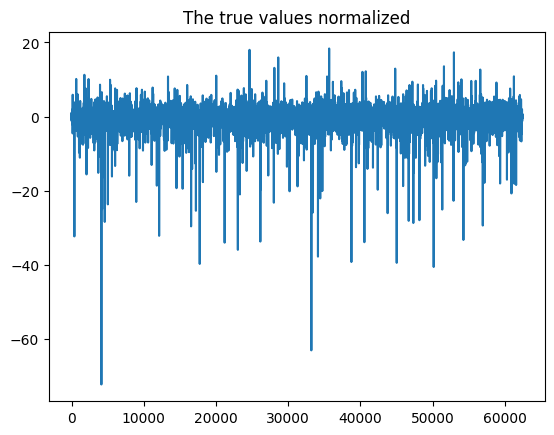

In [157]:
plt.title('The true values normalized')
plt.plot(range(len(results_target)), results_target)

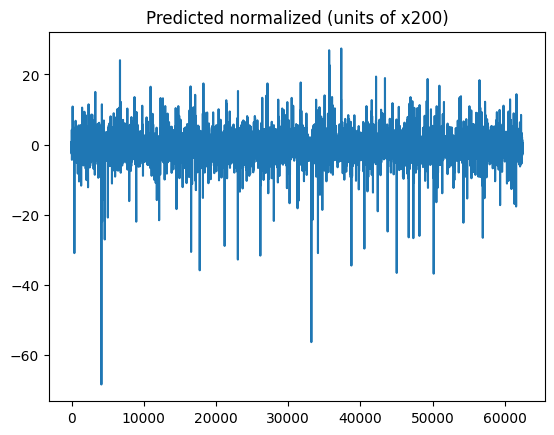

In [158]:
plt.title('Predicted normalized (units of x200)')
plt.plot(range(len(results_output)), [x[0] * 200 for x in results_output])

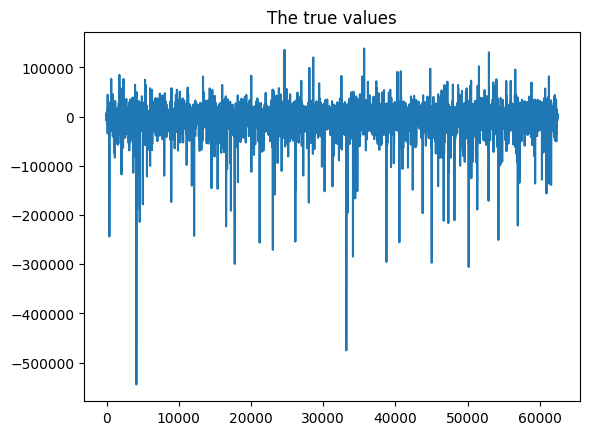

In [159]:
plt.title('The true values')
plt.plot(range(len(results_target_view)), results_target_view)

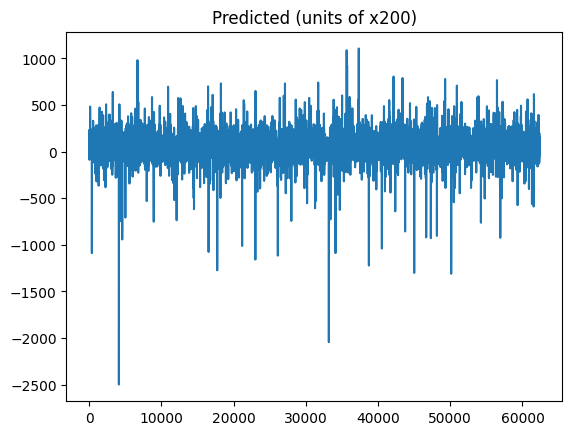

In [160]:
plt.title('Predicted (units of x200)')
plt.plot(range(len(results_output_view)), results_output_view)

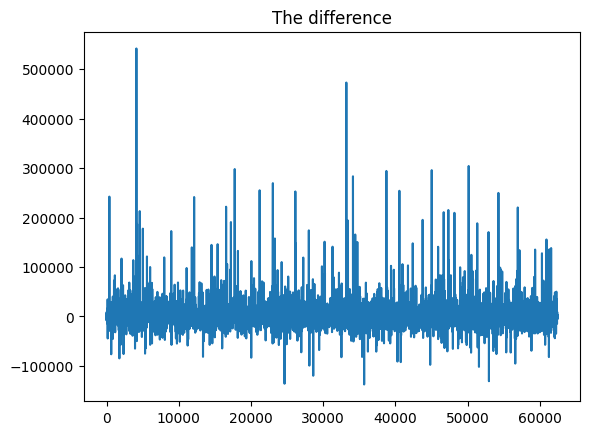

In [161]:
plt.title('The difference')
plt.plot(range(len(results_output_view)), [results_output_view[i] - results_target_view[i] for i in range(len(results_output_view))])

## LSTM Model

In [258]:
train_1_df = train_df.copy()
test_1_df = test_df.copy()

In [259]:
for store in store_df["Store"].unique():
    train_1_df["Store-" + str(store)] = (train_1_df["Store"] == store).map({True: 1, False: 0})
    test_1_df["Store-" + str(store)] = (test_1_df["Store"] == store).map({True: 1, False: 0})

for dept in train_1_df["Dept"].unique():
    train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
    test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})

/tmp/ipykernel_7483/2157136067.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
/tmp/ipykernel_7483/2157136067.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})
/tmp/ipykernel_7483/2157136067.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [260]:
x_train = train_1_df.drop(columns=["Weekly-Diff"])
y_train = train_1_df["Weekly-Diff"]

x_test = test_1_df.drop(columns=["Weekly-Diff"])
y_test = test_1_df["Weekly-Diff"]

In [261]:
x_train["Date"] = x_train["Date"].apply(lambda x: x.value)
x_test["Date"] = x_test["Date"].apply(lambda x: x.value)

In [262]:
for column in x_train.columns:
    x_train[column] = x_train[column].astype(float)
    x_test[column] = x_test[column].astype(float)

In [263]:
x_train = x_train.drop(columns=["index"])
x_test = x_test.drop(columns=["index"])

In [264]:
for column in x_train.columns:
    print(column)

Store
Dept
Date
Temperature
Fuel_Price
CPI
Unemployment
IsHoliday
Store-Type
Store-Size
Weekly-Sales-last-1-weeks
Weekly-Sales-last-2-weeks
Weekly-Sales-last-3-weeks
Weekly-Sales-last-4-weeks
Weekly-Diff-last-1-weeks
Weekly-Diff-last-2-weeks
Weekly-Diff-last-3-weeks
Year-Sin
Year-Cos
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-2
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-3
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-4
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dep

In [265]:
for column in ['Weekly-Sales-last-1-weeks', 'Weekly-Sales-last-2-weeks', 'Weekly-Sales-last-3-weeks', 'Weekly-Sales-last-4-weeks', 
               'Weekly-Diff-last-1-weeks', 'Weekly-Diff-last-2-weeks', 'Weekly-Diff-last-3-weeks']:
    x_train = x_train.drop(columns=[column])
    x_test = x_test.drop(columns=[column])

In [266]:
x_train['Weekly-Diff'] = y_train
x_test['Weekly-Diff'] = y_test

/tmp/ipykernel_7483/2987542405.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_train['Weekly-Diff'] = y_train
/tmp/ipykernel_7483/2987542405.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test['Weekly-Diff'] = y_test


In [267]:
for column in x_train.columns:
    print(column)

Store
Dept
Date
Temperature
Fuel_Price
CPI
Unemployment
IsHoliday
Store-Type
Store-Size
Year-Sin
Year-Cos
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-2
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-3
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-4
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dept-49
Dept-5
Dept-51
Dept-52
Dept-54
Dept-55
Dept-56
Dept-58
Dept-59
Dept-6
Dept-60
Dept-67
Dept-7
Dept-71
Dept-72
Dept-74
Dept-79
Dept-8
Dept-80
Dept-81
Dept-82
Dept-83
Dept-85
De

In [268]:
train_columns_size = x_train.columns.size
train_columns_size = x_test.columns.size

train_columns_size, train_columns_size

(136, 136)

In [269]:
# remove the Store-Dept that are not in the train and test

train_store_dept = x_train["Store"].astype(int).astype(str) + "-" + x_train["Dept"].astype(int).astype(str)
test_store_dept = x_test["Store"].astype(int).astype(str) + "-" + x_test["Dept"].astype(int).astype(str)

train_store_dept = train_store_dept.unique()
test_store_dept = test_store_dept.unique()

# Calculate the difference
diff_a = set(train_store_dept) - set(test_store_dept)
diff_b = set(test_store_dept) - set(train_store_dept)

x_train_new = x_train.copy()
x_test_new = x_test.copy()

for store_dept in set(list(diff_a) + list(diff_b)):
    store, dept = store_dept.split("-")
    
    x_train_new = x_train_new[(x_train_new["Store"] != int(store)) | (x_train_new["Dept"] != int(dept))]
    x_test_new = x_test_new[(x_test_new["Store"] != int(store)) | (x_test_new["Dept"] != int(dept))]

x_train.count()[0], x_test.count()[0], x_train_new.count()[0], x_test_new.count()[0]

/tmp/ipykernel_7483/986057013.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_train.count()[0], x_test.count()[0], x_train_new.count()[0], x_test_new.count()[0]
/tmp/ipykernel_7483/986057013.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_train.count()[0], x_test.count()[0], x_train_new.count()[0], x_test_new.count()[0]
/tmp/ipykernel_7483/986057013.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_train.count()[0

(263003, 62418, 262046, 62282)

In [270]:
x_train = x_train_new
x_test = x_test_new

In [238]:
for column in x_train.columns:
    print(column)

Store
Dept
Date
Temperature
Fuel_Price
CPI
Unemployment
IsHoliday
Store-Type
Store-Size
Year-Sin
Year-Cos
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-2
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-3
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-4
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dept-49
Dept-5
Dept-51
Dept-52
Dept-54
Dept-55
Dept-56
Dept-58
Dept-59
Dept-6
Dept-60
Dept-67
Dept-7
Dept-71
Dept-72
Dept-74
Dept-79
Dept-8
Dept-80
Dept-81
Dept-82
Dept-83
Dept-85
De

In [239]:
y_train.describe()

count    263003.000000
mean         74.727099
std        7535.656472
min     -561345.540000
25%        -618.460000
50%           1.870000
75%         667.005000
max      568347.700000
Name: Weekly-Diff, dtype: float64

In [168]:
mean_norm = y_train.mean()
std_norm = y_train.std()

y_train = (y_train - mean_norm) / std_norm
y_test = (y_test - mean_norm) / std_norm

In [171]:
y_train.describe()

count    2.630030e+05
mean    -3.640477e-18
std      1.000000e+00
min     -7.450184e+01
25%     -9.198762e-02
50%     -9.668315e-03
75%      7.859672e-02
max      7.541121e+01
Name: Weekly-Diff, dtype: float64

In [173]:
x_train.describe()

,index,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,...,Dept-93,Dept-94,Dept-95,Dept-96,Dept-97,Dept-98,Dept-99,Dept-50,Dept-78,Dept-65
count,263003.000000,263003.000000,263003.000000,2.630030e+05,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,...,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000
mean,162646.200279,22.168663,44.110292,1.295361e+18,61.202052,3.231825,169.414402,8.238731,0.067151,1.587164,...,0.014011,0.013106,0.015399,0.011213,0.014985,0.013608,0.000570,0.003684,0.000190,0.000342
std,93940.571808,12.776697,30.441912,1.570399e+16,18.275569,0.442394,38.386402,1.870054,0.250284,0.664492,...,0.117537,0.113730,0.123134,0.105295,0.121491,0.115858,0.023875,0.060587,0.013787,0.018496
min,0.000000,1.000000,1.000000,1.268352e+18,-2.060000,2.513000,126.064000,4.420000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81342.500000,11.000000,18.000000,1.281658e+18,48.450000,2.819000,132.064433,7.287000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,162621.000000,22.000000,37.000000,1.295568e+18,63.440000,3.139000,182.256960,8.028000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,244006.500000,33.000000,72.000000,1.308874e+18,74.830000,3.625000,211.064888,8.684000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,325414.000000,45.000000,99.000000,1.322179e+18,100.140000,4.211000,222.138968,14.313000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
for column in x_train.columns:
    if x_train[column].max() > 1:
        x_mean_size = x_train[column].mean()
        x_std_size = x_train[column].std()

        x_train[column] = (x_train[column] - x_mean_size) / x_std_size
        x_test[column] = (x_test[column] - x_mean_size) / x_std_size

In [175]:
x_train.describe()

,index,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,...,Dept-93,Dept-94,Dept-95,Dept-96,Dept-97,Dept-98,Dept-99,Dept-50,Dept-78,Dept-65
count,2.630030e+05,2.630030e+05,2.630030e+05,2.630030e+05,2.630030e+05,2.630030e+05,2.630030e+05,2.630030e+05,263003.000000,2.630030e+05,...,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000,263003.000000
mean,-1.824156e-16,8.818194e-17,1.262212e-16,-9.041796e-15,-2.001384e-16,1.516167e-15,5.463822e-16,8.749032e-16,0.067151,6.440740e-17,...,0.014011,0.013106,0.015399,0.011213,0.014985,0.013608,0.000570,0.003684,0.000190,0.000342
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.250284,1.000000e+00,...,0.117537,0.113730,0.123134,0.105295,0.121491,0.115858,0.023875,0.060587,0.013787,0.018496
min,-1.731373e+00,-1.656818e+00,-1.416149e+00,-1.719879e+00,-3.461564e+00,-1.624852e+00,-1.129317e+00,-2.042043e+00,0.000000,-8.836286e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.654802e-01,-8.741432e-01,-8.577087e-01,-8.726044e-01,-6.977650e-01,-9.331608e-01,-9.730000e-01,-5.089324e-01,0.000000,-8.836286e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.682577e-04,-1.320087e-02,-2.335692e-01,1.318328e-02,1.224557e-01,-2.098238e-01,3.345601e-01,-1.126872e-01,0.000000,-8.836286e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.660827e-01,8.477415e-01,9.161615e-01,8.604584e-01,7.456922e-01,8.887443e-01,1.085032e+00,2.381047e-01,0.000000,6.212797e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.732668e+00,1.786951e+00,1.803097e+00,1.707734e+00,2.130601e+00,2.213355e+00,1.373522e+00,3.248178e+00,1.000000,2.126188e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [177]:
x_train.shape, y_train.shape

(torch.Size([263003, 143]), torch.Size([263003]))

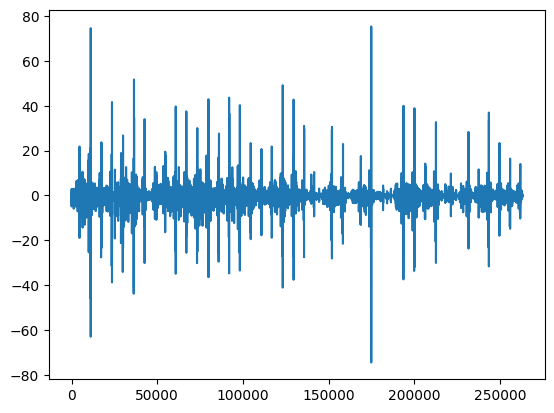

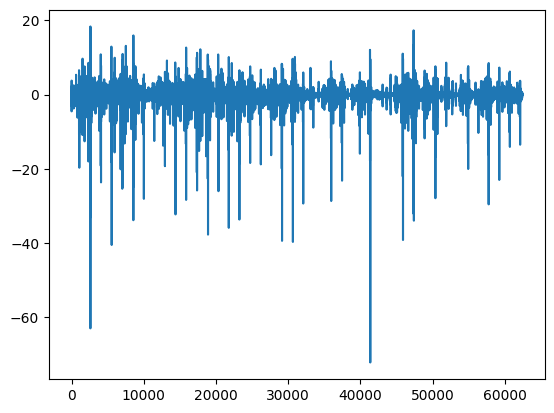

In [178]:
plt.plot(range(len(y_train)), y_train)
plt.show()

plt.plot(range(len(y_test)), y_test)
plt.show()

In [ ]:
class LSTMModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = torch.nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(50, 1)
    
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x


def train_lstm_model(model, num_epochs, batch_size):
    optimizer = torch.optim.Adam(model.parameters())
    loss_fn = torch.nn.MSELoss()
    loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train, y_train), shuffle=True, batch_size=batch_size)

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Validation
        if epoch % 100 == 0:
            model.eval()
            with torch.no_grad():
                y_pred = model(x_train)
                train_rmse = np.sqrt(loss_fn(y_pred, y_train))
                
                y_pred = model(x_test)
                test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        
            print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))